<a href="https://colab.research.google.com/github/AlexBB999/Thinkful/blob/master/DataCleaning_14_4_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
import statsmodels.stats.proportion as proportion
from statsmodels.stats.weightstats import CompareMeans

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [4]:
# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [0]:
#youtube_df = pd.read_sql_query('select * from youtube',con=engine)
ed0 = pd.read_sql_query('select * FROM useducation',con=engine)


#educate= engine.execute('SELECT * FROM useducation' )
engine.dispose()

In [0]:
# use fetchall() to get a list of rows from the results.
#ed = educate.fetchall()

In [0]:
ed=ed0.copy()

In [0]:
ed1=ed0.copy()

In [0]:
ed2=ed0.copy()

In [10]:
ed.head(3)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895


In [0]:
#ed.info()

In [0]:
#ed.isnull()

In [0]:
#for column_name in ed.columns:
    #print("Unique values in column {} are: {}".format(column_name, ed[column_name].unique()))

GET A SENSE OF THE MAGNITUDE OF THE MSSING VALUES -- percentage missing for each column

In [11]:
ed.isnull().sum()*100/ed.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [0]:
ed.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [0]:
#ed.LOCAL_REVENUE.value_counts(dropna=False)

ANSWERS 

1 - VARIABLE TYPE AND FRACTION MISSING --SEE ABOVE

 OVER 10% MISSING FORGET FILLING IN MISSING VALUES UNLESS COLUMN IS CRITICAL  -- drop column

2 - Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?


 AVG MATH AND READING GRADES 4 AND 8 ARE MISSING ALMOST 2/3 OF ENTRIES -- DROP THESE 4  COLUMNS

ed["GRADES_4_G"]=ed['GRADES_4_G'].interpolate()
ed["GRADES_8_G"]=ed['GRADES_8_G'].interpolate()
ed["GRADES_12_G"]=ed['GRADES_12_G'].interpolate()

PROBLEM 3 BELOW

Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations **for that specific year**.

In [0]:
type(ed1.groupby('YEAR')['AVG_MATH_4_SCORE'])
#e_year=np.nanmean(ed.groupby('YEAR')['AVG_MATH_4_SCORE'],axis=1)
#e_year

pandas.core.groupby.generic.SeriesGroupBy

In [0]:
ed1['GRADES_4_G'].describe()

count      1361.000000
mean      64538.927259
std       80293.387625
min         633.000000
25%       13739.000000
50%       43272.000000
75%       75481.000000
max      493415.000000
Name: GRADES_4_G, dtype: float64

In [0]:

#df.D = df.groupby(['A','B','C'])['D'].apply(lambda x: x.fillna(x.mean()))
#df.D = df.groupby(['A','B','C'])['D'].apply(lambda x: x.fillna(x.mean()))
ed1["GRADES_4_G"]=ed1.groupby(['YEAR'])["GRADES_4_G"].apply(lambda x: x.fillna(x.mean()))
ed1["GRADES_8_G"]=ed1.groupby(['YEAR'])["GRADES_8_G"].apply(lambda x: x.fillna(x.mean()))
ed1["GRADES_12_G"]=ed1.groupby(['YEAR'])["GRADES_12_G"].apply(lambda x: x.fillna(x.mean()))

ed1['GRADES_4_G'].describe()

count      1390.000000
mean      64590.152441
std       79451.944548
min         633.000000
25%       14190.500000
50%       44909.500000
75%       75149.750000
max      493415.000000
Name: GRADES_4_G, dtype: float64

In [0]:
ed1['GRADES_4_G'].describe()

count      1361.000000
mean      64538.927259
std       80293.387625
min         633.000000
25%       13739.000000
50%       43272.000000
75%       75481.000000
max      493415.000000
Name: GRADES_4_G, dtype: float64

#///////////////////////////////////////////////////////////////////////////////////////////////////////

PROBLEM 4

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
"STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
"INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
"OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G","GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", "GRADES_9_12_G", "GRADES_ALL_G"]

4. This time, fill in the missing values using interpolation (extrapolation).


In [0]:
for col in fill_list:
  ed2[col]=ed2[col].interpolate()

In [0]:
ed2.dropna(inplace=True)

In [0]:
#ed2.info()

In [0]:
#ed2['GRADES_4_G'].describe()

ed2["GRADES_4_G"]=ed2['GRADES_4_G'].interpolate()
ed2["GRADES_8_G"]=ed2['GRADES_8_G'].interpolate()
ed2["GRADES_12_G"]=ed2['GRADES_12_G'].interpolate()

PROBLEM 5

In [0]:
for col in fill_list:
  ed2[col]=ed2.groupby(['YEAR'])[col].apply(lambda x: x.fillna(x.interpolate(limit_direction='both')))

In [0]:
#for col in fill_list2:
  #print("Statistics for columns: {}".format(col))
  #print(pd.concat([ed0[col],ed[col], ed1[col],
  #ed2[col]], axis=1).describe())

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

START SECTION 14.4 PROBLEM SET

1 - Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE.

 Do these variables have outlier values?

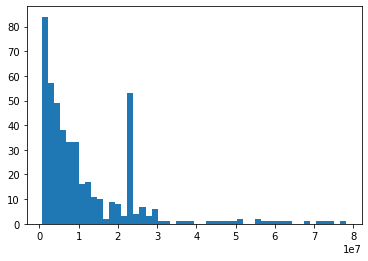

In [51]:
plt.hist(ed2['TOTAL_REVENUE'],bins=50)
plt.show()

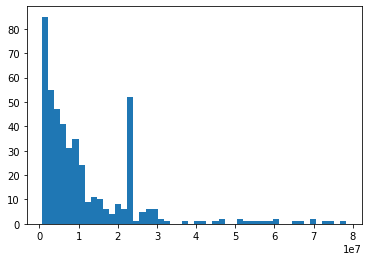

In [52]:
plt.hist(ed2['TOTAL_EXPENDITURE'],bins=50)
plt.show()

BASED ON HISTOGRAMS THERE ARE OUTLIERS

LET'S EXPLORE FURTHER

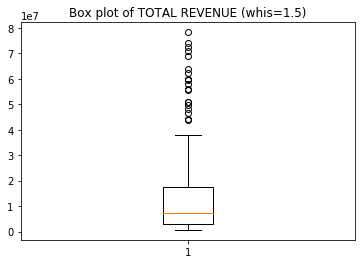

In [53]:
plt.boxplot(ed2["TOTAL_REVENUE"],whis=1.5)
plt.title("Box plot of TOTAL REVENUE (whis=1.5)")
plt.show()

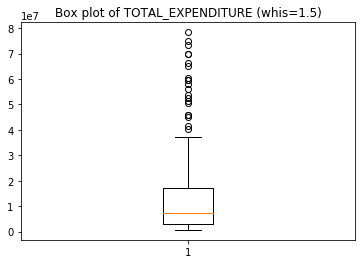

In [54]:
plt.boxplot(ed2["TOTAL_EXPENDITURE"],whis=1.5)
plt.title("Box plot of TOTAL_EXPENDITURE (whis=1.5)")
plt.show()

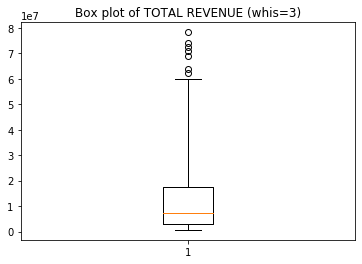

In [55]:
plt.boxplot(ed2["TOTAL_REVENUE"],whis=3)
plt.title("Box plot of TOTAL REVENUE (whis=3)")
plt.show()

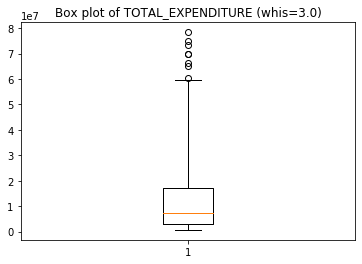

In [56]:
plt.boxplot(ed2["TOTAL_EXPENDITURE"],whis=3.0)
plt.title("Box plot of TOTAL_EXPENDITURE (whis=3.0)")
plt.show()

Z SCORE

In [57]:
from scipy.stats import zscore

z_scores = zscore(ed2["TOTAL_REVENUE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  28,  54,  63,  92, 103, 115, 143, 154, 166, 171, 192, 194,
       200, 205, 217, 223, 227, 245, 247, 253, 258, 270, 275, 279, 296,
       298, 304, 309, 323, 332, 349, 351, 357, 362, 374, 379, 383, 400,
       402, 408, 413]),)
Number of outliers is: 42
The score threshold is: 2
The indices of the outliers:
(array([ 28,  63,  92, 115, 143, 154, 166, 194, 205, 217, 247, 258, 270,
       298, 309, 323, 351, 362, 374, 402, 413]),)
Number of outliers is: 21
The score threshold is: 3
The indices of the outliers:
(array([ 63, 115, 166, 194, 217, 247, 270, 298, 309, 323, 351, 374, 402,
       413]),)
Number of outliers is: 14
The score threshold is: 4
The indices of the outliers:
(array([166, 217, 270, 323, 374, 402]),)
Number of outliers is: 6


TUKEY'S METHOD -- also known as the Interquartile Range (IQR) method

In [58]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(ed2["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((ed2["TOTAL_REVENUE"] > max_val) 
                      | (ed2["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 22
The score threshold is: 1.5
Number of outliers is: 19
The score threshold is: 2.0
Number of outliers is: 16
The score threshold is: 2.5
Number of outliers is: 12
The score threshold is: 3.0
Number of outliers is: 7
The score threshold is: 3.5
Number of outliers is: 4
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 0


2 - If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables,

 apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

WINSORIZATION

In [85]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_views = winsorize(ed2["TOTAL_REVENUE"], (0, 0.10))
winsorized_views2 = winsorize(ed2["TOTAL_EXPENDITURE"], (0, 0.10))
winsorized_views

TypeError: ignored

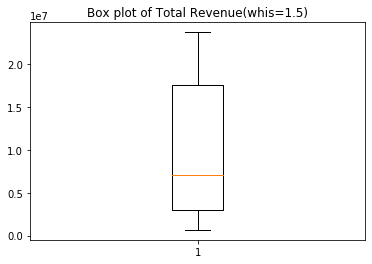

In [60]:
plt.boxplot(winsorized_views)
plt.title("Box plot of Total Revenue(whis=1.5)")
plt.show()

In [61]:
winsorized_views2

masked_array(data=[ 3572283.,  4391555.,  2297381., 23352516.,  4075165.,
                    4538234.,   703245., 13936240.,  1231550.,  3284185.,
                    3826435.,  3815375.,  1465093.,  5825606.,  7479576.,
                     924259.,  1642517.,  6517111.,  4284181., 22401797.,
                    6903384.,  6578388.,  6521058.,   676305.,  8447882.,
                    5003267.,  5397194.,  2683400., 23352516.,  5605280.,
                     858807., 10884510.,  1363511.,  1467977.,  8518477.,
                    3327090.,  4510972.,  4807097.,  1842276.,  7355698.,
                    9466363.,  7736391.,  6708608.,  1051768.,  2165529.,
                    2437438.,  2165031.,  9275837.,   802768., 14909952.,
                    3876871.,  4398318.,  4961392.,  5805181., 23352516.,
                    2478420.,  1193813.,  9154676.,  2243563.,  5298932.,
                    1610289.,  6210287.,  3242799., 23352516.,  6685029.,
                    6751815.,  1317447

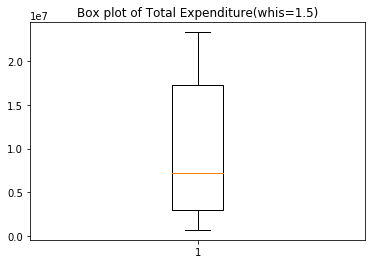

In [62]:
plt.boxplot(winsorized_views2)
plt.title("Box plot of Total Expenditure(whis=1.5)")
plt.show()

 LOG TRANSFORMATIONS

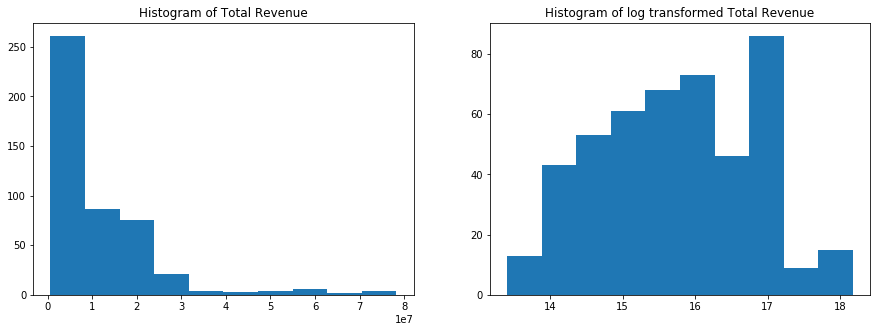

In [63]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(ed2["TOTAL_REVENUE"])
plt.title("Histogram of Total Revenue")

plt.subplot(1,2,2)
plt.hist(np.log(ed2["TOTAL_REVENUE"]))
plt.title("Histogram of log transformed Total Revenue")
plt.show()

Let's look at the box plots of the original variable and its log transformed variant to see whether log transformation has an effect on the outliers:

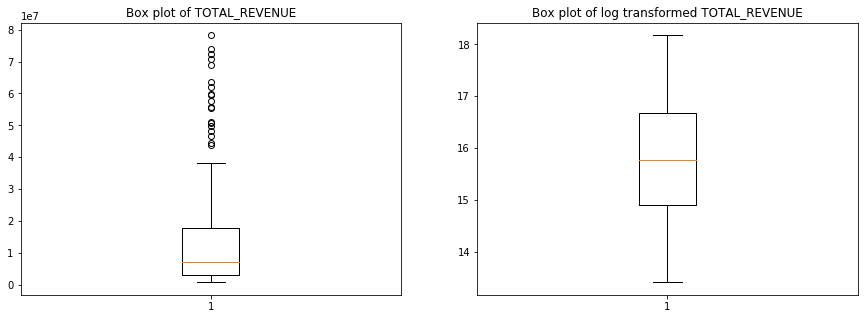

In [64]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(ed2["TOTAL_REVENUE"])
plt.title("Box plot of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.boxplot(np.log(ed2["TOTAL_REVENUE"]))
plt.title("Box plot of log transformed TOTAL_REVENUE")
plt.show()

TUKEY'S

In [27]:
q75, q25 = np.percentile(ed2["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((ed2["TOTAL_REVENUE"] > max_val) 
                      | (ed2["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 50
The score threshold is: 1.5
Number of outliers is: 40
The score threshold is: 2.0
Number of outliers is: 33
The score threshold is: 2.5
Number of outliers is: 21
The score threshold is: 3.0
Number of outliers is: 12
The score threshold is: 3.5
Number of outliers is: 6
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 1


NOW REPEAT FOR TOTAL EXPENDITURES

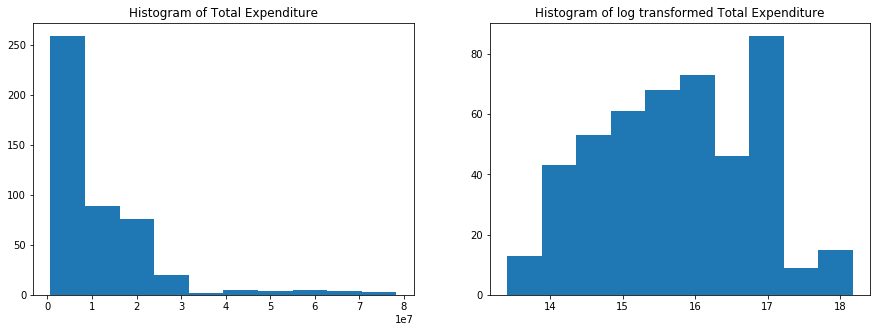

In [65]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(ed2["TOTAL_EXPENDITURE"])
plt.title("Histogram of Total Expenditure")

plt.subplot(1,2,2)
plt.hist(np.log(ed2["TOTAL_REVENUE"]))
plt.title("Histogram of log transformed Total Expenditure")
plt.show()

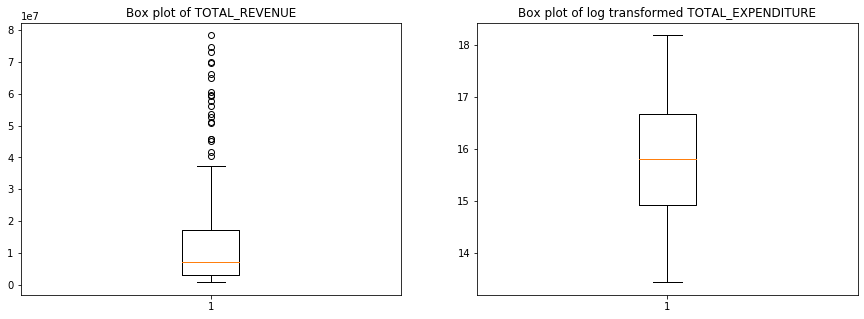

In [66]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(ed2["TOTAL_EXPENDITURE"])
plt.title("Box plot of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.boxplot(np.log(ed2["TOTAL_EXPENDITURE"]))
plt.title("Box plot of log transformed TOTAL_EXPENDITURE")
plt.show()

TUKEY'S

In [67]:
q75, q25 = np.percentile(ed2["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((ed2["TOTAL_EXPENDITURE"] > max_val) 
                      | (ed2["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 24
The score threshold is: 1.5
Number of outliers is: 21
The score threshold is: 2.0
Number of outliers is: 18
The score threshold is: 2.5
Number of outliers is: 13
The score threshold is: 3.0
Number of outliers is: 8
The score threshold is: 3.5
Number of outliers is: 5
The score threshold is: 4.0
Number of outliers is: 2
The score threshold is: 4.5
Number of outliers is: 0


In [31]:
ed2['TOTAL_EXPENDITURE'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1487    False
1488    False
1489    False
1490    False
1491    False
Name: TOTAL_EXPENDITURE, Length: 1492, dtype: bool

In [68]:
ed2['TOTAL_EXPENDITURE'].isnull().sum()

0

3- Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers).

 You can think of it as a kind of budget deficit in education.
 
  Do you find any outlier values in this new variable? 
  
  If so, eliminate them using the technique you think most suitable.

In [0]:
ed2['TOTAL_DIFF']=ed2['TOTAL_REVENUE']-ed2['TOTAL_EXPENDITURE']

In [70]:
ed2['TOTAL_DIFF'].head()

209   -207170.0
211   -248251.0
212   -113997.0
213   -278711.0
214   -183962.0
Name: TOTAL_DIFF, dtype: float64

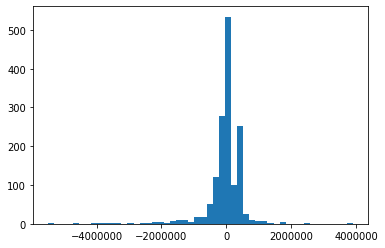

In [35]:
plt.hist(ed2['TOTAL_DIFF'],bins=50)
plt.show()

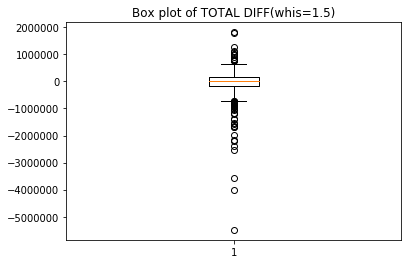

In [71]:
plt.boxplot(ed2["TOTAL_DIFF"],whis=1.5)
plt.title("Box plot of TOTAL DIFF(whis=1.5)")
plt.show()

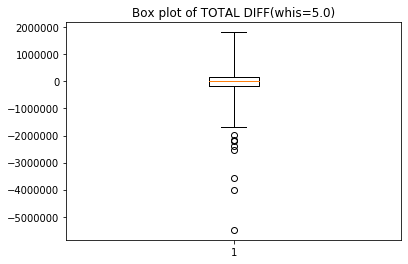

In [72]:
plt.boxplot(ed2["TOTAL_DIFF"],whis=5.0)
plt.title("Box plot of TOTAL DIFF(whis=5.0)")
plt.show()

Z SCORE

In [73]:
from scipy.stats import zscore

z_scores = zscore(ed2["TOTAL_DIFF"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([ 28, 125, 173, 184, 197, 228, 248, 270, 276, 279, 280, 288, 299,
       321, 325, 332, 333, 341, 376, 384, 390, 392, 405]),)
Number of outliers is: 23
The score threshold is: 2
The indices of the outliers:
(array([228, 392, 405]),)
Number of outliers is: 3
The score threshold is: 3
The indices of the outliers:
(array([228, 405]),)
Number of outliers is: 2
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


LOG TRANSFORMATION

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


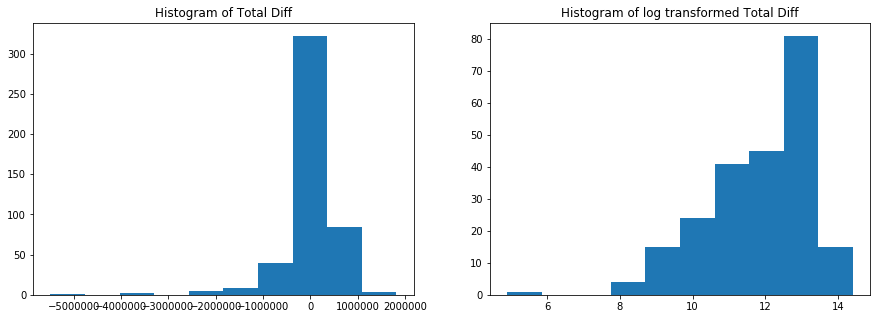

In [74]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(ed2["TOTAL_DIFF"])
plt.title("Histogram of Total Diff")

plt.subplot(1,2,2)
plt.hist(np.log(ed2["TOTAL_DIFF"]))
plt.title("Histogram of log transformed Total Diff")
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


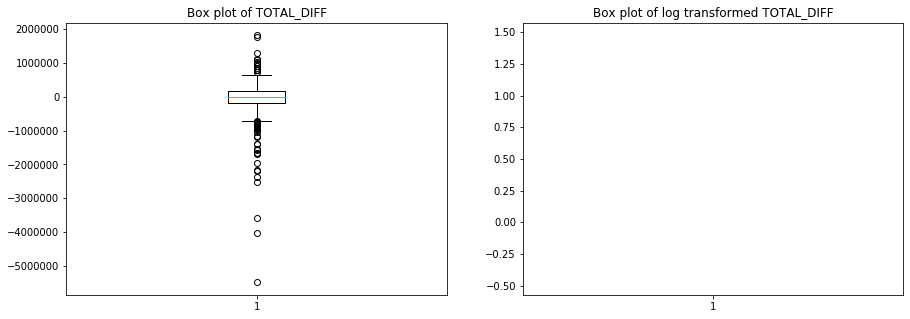

In [75]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(ed2["TOTAL_DIFF"])
plt.title("Box plot of TOTAL_DIFF")

plt.subplot(1,2,2)
plt.boxplot(np.log(ed2["TOTAL_DIFF"]))
plt.title("Box plot of log transformed TOTAL_DIFF")
plt.show()

EMOTY BOX PLOT OF LOG TRANSFORMED TOTAL DIFF MEANS LOG TRANSFORM TOOK CARE OF ALL OUTLIERS

WE CAN DOUBLE CHECK WITH Z SCORE

In [76]:
from scipy.stats import zscore

z_scores = zscore(np.log(ed2["TOTAL_DIFF"]))
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


TUKEYS WITH LOG TRANSFORM

In [77]:
# now we take the log of TOTAL_DIFF and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(ed2["TOTAL_DIFF"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(ed2["TOTAL_DIFF"]) > max_val) 
                      | (np.log(ed2["TOTAL_DIFF"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


SO TUKEY'S CONFIRMS THAT LOG TRANSFORM ELIMINATED OUTLIERS

4 - Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE.

 This time, use the **outlier eliminated** versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. 
 
 In this newly created variable, can you find any outliers?
 
  If so, **eliminate them.**

In [0]:
v=np.log(ed2['TOTAL_REVENUE'])-np.log(ed2['TOTAL_EXPENDITURE'])

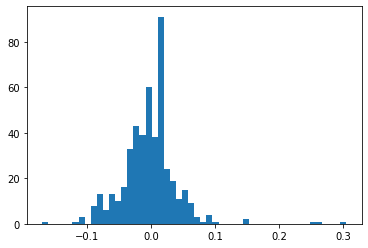

In [79]:
plt.hist(v,bins=50)
plt.show()


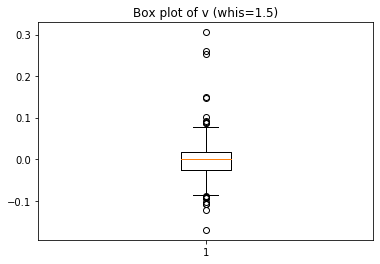

In [80]:
plt.boxplot(v,whis=1.5)
plt.title("Box plot of v (whis=1.5)")
plt.show()

MANY OUTLIERS


5 - Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions.

 Do you see any differences?

In [81]:
v.describe()

count    467.000000
mean      -0.001865
std        0.044397
min       -0.170369
25%       -0.025170
50%       -0.000375
75%        0.017574
max        0.305521
dtype: float64

In [82]:
ed2['TOTAL_DIFF'].describe()


count    4.670000e+02
mean    -5.245817e+04
std      5.888767e+05
min     -5.487742e+06
25%     -1.825965e+05
50%     -1.524000e+03
75%      1.712450e+05
max      1.816932e+06
Name: TOTAL_DIFF, dtype: float64

In [84]:
np.log(ed2['TOTAL_DIFF']).describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    226.000000
mean      11.835200
std        1.438688
min        4.890349
25%       10.939465
50%       12.126811
75%       12.933653
max       14.412660
Name: TOTAL_DIFF, dtype: float64

yes -- many values are different

thinkful solution used winzorization -- i used log

6- our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable:

 the method in the 3rd question or the one in the 4th question?